In [46]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv("Credit_Card_Customer_Data.csv")

In [7]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [11]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


Pick only the behavioral features (drop IDs)

In [19]:
df_copy = df.drop(columns=["Sl_No","Customer Key"])

In [20]:
df_copy.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


Let's see some relations here:-
High Limit with More Cards and less calls = premium user

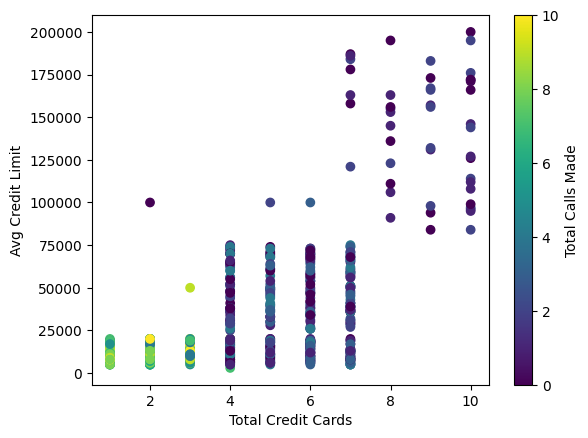

In [35]:
plt.scatter(
    df['Total_Credit_Cards'],
    df['Avg_Credit_Limit'],
    c=df['Total_calls_made'],
    cmap='viridis'
)
plt.colorbar(label='Total Calls Made')
plt.ylabel('Avg Credit Limit')
plt.xlabel('Total Credit Cards')
plt.show()

In [ ]:
km = KMeans(n_clusters=3)
predict = km.fit_predict(df_copy)

I created 3 groupes between customers having (Avg_Credit_Limit, Total_Credit_Cards, and Total_calls_made)

In [42]:
df_copy['group'] = predict
df_copy.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group
0,100000,2,1,1,0,1
1,50000,3,0,10,9,1
2,50000,7,1,3,4,1
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1


we do scaling now

In [43]:
features = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_calls_made']
X = df_copy[features].copy()

In [48]:
# 2) Scale (very important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) Fit K-Means on scaled data
km = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = km.fit_predict(X_scaled)

# 4) Add cluster labels back to original df_copy
df_copy['group'] = clusters

# 5) Interpret clusters (means in original units)
cluster_profile = df_copy.groupby('group')[features].mean().round(2)
print(cluster_profile)

       Avg_Credit_Limit  Total_Credit_Cards  Total_calls_made
group                                                        
0             142750.00                8.88              1.02
1              12170.51                2.36              6.98
2              33736.71                5.49              2.03
